In [328]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Linear Regression Assignment**


## Part 1: Linear regression with 1 feature

1. Prepare your data samples. This is a simulated your sample data.

In [329]:
# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

2. Generate a randomized theta ranged between +1 and -1. We use random seed to ensure that the random results are the same everytime for all students. <font color='red'> Complete the generateRandomNumber() function and verify the results. </font>

In [330]:
def generateRandomNumber(randomSeed):
  random.seed(randomSeed)
  # Generate two random numbers by using random.random() and scale theta to be between -1 and + 1
  theta0 = 2*random.random() - 1
  theta1 = 2*random.random() - 1
  return [theta0, theta1]

In [331]:
print(generateRandomNumber(42))

[0.2788535969157675, -0.9499784895546661]


In [332]:
assert generateRandomNumber(42) == [0.2788535969157675, -0.9499784895546661]

3. Make thee prediction. You will have to write the prediction and verify that you have the correct results. <font color='red'> Complete the prediction() function and verify the results. </font>

In [333]:
def prediction(theta0, theta1, X):
   h = theta0 + np.dot(theta1,X)
   return h

In [334]:
theta0, theta1 = generateRandomNumber(42)
h = prediction(theta0, theta1, X)
print(h)

[-0.67112489 -1.62110338 -2.57108187 -3.52106036 -4.47103885]


In [335]:
assert np.allclose(prediction(theta0, theta1, X), [-0.6711248926388986, -1.6211033821935648, -2.5710818717482313, -3.5210603613028972, -4.471038850857563])

4. Calculate the loss of your. Write the loss function. <font color='red'> Complete the mseLoss() function and verify the results. </font>

In [336]:
def mseLoss(h, y):
  loss = (1/(2*len(y))) * np.sum((h - y)**2)
  return loss

In [337]:
h = prediction(theta0, theta1, X)
mseLoss(h,y)

25.391974592335018

In [338]:
h = prediction(theta0, theta1, X)
assert  np.allclose(mseLoss(h,y), 25.391974592335018)

5. Calculate the gradients. <font color='red'> Complete the gradients() function and verify the results. </font>

In [339]:
def gradients(h,y,X):
  dTheta1 = (1/len(X)) * np.dot(X.T,(h - y))
  dTheta0 = (1/len(X)) * np.sum(h - y)
  return [dTheta0, dTheta1]

In [340]:
gradients(h,y,X)

[-6.571081871748231, -23.61320259435403]

In [341]:
assert np.allclose(gradients(h,y,X), [-6.571081871748231, -23.61320259435403])

6. Do gradient descent. Update theta using the gradients. <font color='red'> Complete the updateTheta() function and verify the results. </font>

In [342]:
def updateTheta(theta0, theta1, dTheta0, dTheta1, alpha):
  theta0 -= alpha*dTheta0
  theta1 -= alpha*dTheta1
  return [ theta0, theta1 ]

In [343]:
dTheta0, dTheta1 = gradients(h,y,X)
updateTheta(theta0, theta1, dTheta0, dTheta1, 0.01)

[0.3445644156332498, -0.7138464636111258]

In [344]:
dTheta0, dTheta1 = gradients(h,y,X)
assert np.allclose(updateTheta(theta0, theta1, dTheta0, dTheta1, 0.01), [0.3445644156332498, -0.7138464636111258])

7. Putting it all together. <font color='red'> Complete the linearRegression2Param() function and verify the results. </font>

In [345]:
def linearRegression2Param(X, y, iterations):
  # Write your code for the linearRegression2Param function using the other fuctions you have previously created.
  theta0, theta1 = generateRandomNumber(42)
  
  for _ in range(iterations):
    h = prediction(theta0, theta1, X)
    loss = mseLoss(h,y)
    dTheta0, dTheta1 = gradients(h,y,X)
    theta0, theta1 = updateTheta(theta0, theta1, dTheta0, dTheta1, 0.01)
    
  return [loss, theta0, theta1]

In [346]:
linearRegression2Param(X,y,10)

[2.634842986104685, 0.6776876875123693, 0.4789740035396734]

In [347]:
assert np.allclose(linearRegression2Param(X,y,10), [2.6348429861046845, 0.6776876875123693, 0.47897400353967345])

8. Check the result by plotting. Try playing around with the number of iterations and see how the plot changes.

In [348]:
def plotResult(X,y,theta1, theta0):
  # Plotting the data points
  plt.scatter(X, y, color='blue', label='Data Points')

  # Plotting the line of best fit
  predicted_y = prediction(theta0, theta1, X)

  plt.plot(X, predicted_y, color='red', label='Line of Best Fit')

  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Linear Regression with Gradient Descent')
  plt.legend()
  plt.show()

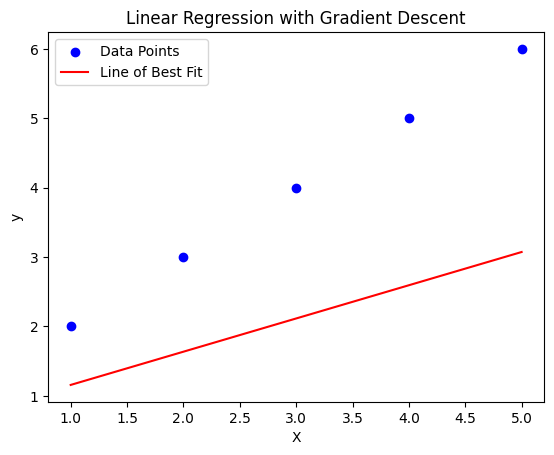

In [349]:
loss, theta0, theta1 = linearRegression2Param(X, y, 10)
plotResult(X,y,theta1, theta0)

## Part 2: Linear regression with Multiple Features using Matrices and Linear Algebra

1. Generate random sample for X. Here we form X as a normal distribution centered around a mean. x0 has std = 1, x2 has std =1 and x3 has std=1.

In [350]:
num_samples = 10

mean_vector = [2, 1, 3]  # Example values, adjust as needed

# Covariance matrix for 3 dimensions
covariance_matrix = [[1, 0.75, 0.5],  # Adjust these values as needed
                     [0.75, 1, 0.25],
                     [0.5, 0.25, 1]]

np.random.seed(42)
x_0 = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)

X = np.hstack((np.ones((num_samples, 1)), x_0))
X

targetTheta = [1.5, 2, 3, -1]
y = np.matmul(X, targetTheta)

In [351]:
print(X)

[[ 1.          1.73467345  0.34013027  2.69494085]
 [ 1.          0.46983255 -0.33002971  2.19519794]
 [ 1.          0.44595421  0.14864114  1.44525358]
 [ 1.          1.28744526  0.45526501  3.04132619]
 [ 1.          0.99650914  0.38400773  4.46721478]
 [ 1.          2.523218    0.92193001  4.08317748]
 [ 1.          3.18679376  0.71546504  4.46687679]
 [ 1.          1.74592374  1.61050775  3.27322009]
 [ 1.          2.1400326   1.82483356  3.41826952]
 [ 1.          1.48695769  0.48538402  3.23196786]]


2. Generate randomised Thetas as an array such that for n=4, thetaArray = [ theta0, theta1, theta2, theta3 ]. <font color='red'> Complete the generateRandomNumber_nFeatures() function and verify the results. </font>

In [352]:
def generateRandomNumber_nFeatures(randomSeed,n):
  # Generate the theta array using random.random()

  random.seed(randomSeed)
  thetaArray = []
  
  for _ in range(n):
    thetaArray.append(2*random.random() - 1)

  return thetaArray

In [353]:
generateRandomNumber_nFeatures(42,4)

[0.2788535969157675,
 -0.9499784895546661,
 -0.4499413632617615,
 -0.5535785237023545]

In [354]:
assert np.allclose(generateRandomNumber_nFeatures(42,4),[0.2788535969157675, -0.9499784895546661, -0.4499413632617615, -0.5535785237023545])

3. Write your prediction function using matrix operations so that we can handle predictions for any dimension of features. <font color='red'> Complete the prediction_nFeatures() function and verify the results. </font>


In [355]:
def prediction_nFeatures(thetaArray, X):
  h = np.dot(X,thetaArray)
  return h

In [356]:
thetaArray = generateRandomNumber_nFeatures(42,4)
h = prediction_nFeatures(thetaArray, X)
expected_array = np.array([-3.01394892, -1.23419763, -1.01173445, -2.83264713, -3.31354378, -4.79332304, -5.54321629, -3.9163548 , -4.46748003, -3.14126657])
assert np.allclose(h, expected_array)

4. Calculate your loss function. <font color='red'> Complete the mseLosss_nFeatures() function and verify the results. </font>

In [357]:
def mseLoss_nFeatures(h,y):
  loss = 1/(2*len(y)) * np.sum((y - h)**2)
  return loss

In [358]:
mseLoss_nFeatures(h,y)

30.199420142208574

In [359]:
assert np.allclose(mseLoss_nFeatures(h,y),30.199420142208574)

5. Calculate your gradients. <font color='red'> Complete the gradients_nFeatures() function and verify the results. </font>

In [360]:
h

array([-3.01394892, -1.23419763, -1.01173445, -2.83264713, -3.31354378,
       -4.79332304, -5.54321629, -3.9163548 , -4.46748003, -3.14126657])

In [361]:
def gradients_nFeatures(h,y,X):
  dThetaArray = (1/len(X)) * np.dot(X.T,(h - y))
  return dThetaArray

In [362]:
dThetaArray = gradients_nFeatures(h,y,X)
print(dThetaArray)
expected_array = np.array([ -6.76533528, -13.63978924, -6.53866163, -23.87364679])
assert np.allclose(dThetaArray, expected_array)

[ -6.76533528 -13.63978924  -6.53866163 -23.87364679]


6. Update the gradients. <font color='red'> Complete the updateTheta_nFeatures() function and verify the results. </font>

In [363]:
def updateTheta_nFeatures( thetaArray, dThetaArray, learning_rate):
  #thetaArrayUpdated = -np.dot(learning_rate,dThetaArray)
  thetaArrayUpdated = thetaArray - (learning_rate*dThetaArray)
  return thetaArrayUpdated

In [364]:
thetaArrayUpdated = updateTheta_nFeatures( thetaArray, dThetaArray, 0.01)
print(thetaArrayUpdated)

[ 0.34650695 -0.8135806  -0.38455475 -0.31484206]


In [365]:
thetaArrayUpdated = updateTheta_nFeatures( thetaArray, dThetaArray, 0.01)
expected_array = np.array([ 0.34650695, -0.8135806 , -0.38455475, -0.31484206])
assert np.allclose(thetaArrayUpdated, expected_array)

7. Put it all together. <font color='red'> Complete the generateRandomNumber() function and verify the results. </font>

In [366]:
def linearRegressionMultiParam(X, y, iterations, learning_rate,features):
  # Write the code for the function linearRegressionMultiParam by utilising the functions you have created earlier.
  thetaArray = generateRandomNumber_nFeatures(42,features)
  h = prediction_nFeatures(thetaArray, X)
  
  for _ in range(iterations):
    h = prediction_nFeatures(thetaArray, X)
    dThetaArray = gradients_nFeatures(h,y,X)
    thetaArray = updateTheta_nFeatures( thetaArray, dThetaArray, learning_rate)
    loss = mseLoss_nFeatures(h,y)
  return [loss, thetaArray]

In [367]:
loss, thetaArray = linearRegressionMultiParam(X,y,10, 0.01,4)
print(thetaArray)
print(loss)

[ 0.62008549 -0.19693099 -0.0540215   0.66186507]
4.377412803144977


In [368]:
loss, thetaArray = linearRegressionMultiParam(X,y,10, 0.01,4)
expected_thetaArray = np.array([ 0.62008549, -0.19693099, -0.0540215 ,  0.66186507])
expected_loss = 4.377412803144978
assert np.allclose(loss, expected_loss)
assert np.allclose(thetaArray, expected_thetaArray)

In [369]:
# loss, thetaArray = linearRegressionMultiParam(X,y,400, 0.01)

## Part 3: Apply to Boston Housing Dataset for Price Prediction

In [370]:
# Obtain the Boston Housing dataset as a csv file from this link here.
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

1. Read data from CSV file and parse it out into an array of values for each row. Then combine the arrays into a Pandas dataframe.

In [371]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv",header=None, delimiter=r"\s+", names=column_names)
df = data

In [372]:
# Verify that your df is correct.

#df = readBostonHousingCsvFromFile()
rowIndex0 = [0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0]
rowIndex112 = [0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8]
rowIndex483 = [2.81838,0.0,18.1,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8]
assert np.allclose(df.iloc[0].tolist(),rowIndex0)
assert np.allclose(df.iloc[112].tolist(),rowIndex112)
assert np.allclose(df.iloc[483].tolist(),rowIndex483)

2. Rename the columns of the dataframe.

In [373]:
# Change column names

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [374]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [375]:
df.assign(bias = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,bias
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1


3. Split the data into train and test set. Use random seed of 42.

In [376]:
from sklearn.model_selection import train_test_split

# Features and target
y = df['MEDV']  # Series with the target variable
X = df.drop( ['MEDV'], axis=1)

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [377]:
X = df_X_train.to_numpy()
y = df_y_train.to_numpy()

In [378]:
X = np.hstack((np.ones(( len(y), 1)), X))

4. Train the model so that the loss is less than 200.

In [379]:
def trainModel(iterations, learning_rate,features):
  loss, thetaArray = linearRegressionMultiParam(X,y,iterations, learning_rate,features)
  return loss

5. Your task is to now successfully train the model. <font color='red'> Complete the code in the next cell. </font>

In [380]:
len(data.columns)

14

In [381]:
# Complete this code below so that your model works!
iterations = 1000
learning_rate = 0.000005
features = len(df.columns)
trainResult = trainModel(iterations,learning_rate,features)
print(trainResult)

45.66441049076087


In [382]:
# Complete this code below so that your model works!
iterations = 1000
learning_rate = 0.000005
trainResult = trainModel(iterations,learning_rate,features)
assert trainResult < 100

In [383]:
loss, thetaArray = linearRegressionMultiParam(X,y,1000, 0.000005,features)
loss

45.66441049076087

5. Make prediction with the test data set.

In [384]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()
X_test = np.hstack((np.ones(( len(y_test), 1)), X_test))

In [385]:
thetaArray.shape

(14,)

In [386]:
h = prediction_nFeatures(thetaArray, X_test)

In [387]:
loss = mseLoss_nFeatures(h,y_test)
loss

57.434265559170484

6. Make sure that your test loss is less than 100. <font color='red'> Final bit now! You've done great to get to this point. Get over the last hurdle and get mse < 100 for the test set. </font>


In [388]:
# Make sure that your test set mse loss is less than 100.

assert mseLoss_nFeatures(h,y_test) < 100